# Class Notebooks

* [HAPI_00.ipynb](HAPI_00.ipynb) - Introduction
* [HAPI_01.ipynb](HAPI_01.ipynb) - Basics
* [HAPI_02.ipynb](HAPI_02.ipynb) - Data structures
* [HAPI_03.ipynb](HAPI_03.ipynb) - Plotting
* **[HAPI_04.ipynb](HAPI_04.ipynb) - Problems (this Notebook)**

# Instructions

Use the rest of the class time to work on these problems. Each problem is expected to take at least one hour, so start with a problem that interests you.

You are welcome to work on problems not given here. However, priority for questions will be given to students working on these problems.

For in-person students, we encourage you to work with one or more neighbors on a problem.

Several HAPI experts are available for questions on chat on Slack in the #hapi channel, and three of us will be on-site for in-person questions.

# Working with Metadata I.

## Basic


Starting with

```python
import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)

print(datasets[0:3])
# [{'id': 'ace', 'title': 'ACE', 'startDate': '1997-08-25T17:48:00.000Z', 'stopDate': '2022-07-04T23:48:00.000Z'}, {'id': 'active', 'title': 'Active', 'startDate': '1989-09-29T00:00:00.000Z', 'stopDate': '1991-10-04T08:00:00.000Z'}, {'id': 'aec', 'title': 'AE-C', 'startDate': '1973-12-17T08:01:00.000Z', 'stopDate': '1978-12-10T00:00:00.000Z'}]
```

use the information in `datasets` to create a table and plot as described in the following subsections. You should be able to do this without requesting additional information from a server.

(The information in `datasets` was creating using `hapi()` [metadata calls](HAPI_02.ipynb#Metadata) to the SSCWeb HAPI server.)

### Table

Create a table showing the time interval of availability of ephemeris data from the SSCWeb HAPI server. The table should have the form

    ace              1997-08-25T17:48:00.000Z  2022-07-04T23:48:00.000Z
    active           1989-09-29T00:00:00.000Z  1991-10-04T08:00:00.000Z
    aec              1973-12-17T08:01:00.000Z  1978-12-10T00:00:00.000Z
    ... (243 more lines)

In [ ]:
import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)
print(datasets[0:3])

# Enter your code here

In [10]:
# Solution

import sys
import logging

from hapiclient import hapitime2datetime

# Change INFO to WARNING or ERROR to suppress logging messages in this script
logging.basicConfig(level=logging.INFO)

import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)

# Several students put the info in datasets into a Pandas DataFrame.
# This is great idea!.
if False:
    import pandas
    df = pandas.DataFrame(datasets)
    display(df)

# Create table
n = 0
datasets.reverse()
table = []
for idx, dataset in enumerate(datasets):
    # Pad ids. Assumes max id length is 14 chars.
    id = datasets[idx]["id"]
    idp = '{0:15s}'.format(id)
    line = f'{idp}  {datasets[idx]["startDate"]}  {datasets[idx]["stopDate"]}'
    print(line)

yohkoh           1991-09-05T00:00:00.000Z  1998-01-02T00:00:00.000Z
xmm              1999-12-21T00:00:00.000Z  2022-05-07T00:00:00.000Z
wind             1994-11-16T00:00:00.000Z  2022-06-28T23:48:00.000Z
viking           1986-03-05T00:00:00.000Z  1987-01-01T00:00:00.000Z
uars             1991-09-20T00:00:00.000Z  2006-05-11T00:00:00.000Z
twins2           2008-04-11T00:00:29.000Z  2016-10-26T23:58:30.000Z
twins1           2007-04-01T00:02:30.000Z  2018-12-12T23:54:29.000Z
tse2017c         2017-08-21T16:49:59.000Z  2017-08-21T20:01:00.000Z
trace            1998-04-02T00:00:00.000Z  2010-10-19T00:00:00.000Z
timed            2002-02-07T00:00:00.000Z  2022-05-15T00:00:00.000Z
themisepred      2008-07-18T00:30:00.000Z  2028-04-27T23:58:59.000Z
themise          2007-02-18T00:13:59.000Z  2022-04-23T23:58:59.000Z
themisdpred      2008-07-18T00:30:00.000Z  2028-04-27T23:58:59.000Z
themisd          2007-02-18T00:13:59.000Z  2022-04-24T23:58:59.000Z
themiscpred      2008-07-18T00:30:00.000Z  2028-

### Plot

Create a plot showing the time interval of availability of ephemeris data from the SSCWeb HAPI server. The plot should look similar to the following.

![](imgs/availability-1.svg)

### Solution

INFO:root:Writing availability.txt
INFO:root:Wrote   availability.txt
INFO:root:Writing ./availability-1.svg
INFO:root:Wrote   ./availability-1.svg
INFO:root:Writing ./availability-2.svg
INFO:root:Wrote   ./availability-2.svg
INFO:root:Writing ./availability-3.svg
INFO:root:Wrote   ./availability-3.svg
INFO:root:Writing ./availability-4.svg
INFO:root:Wrote   ./availability-4.svg
INFO:root:Writing ./availability-4.svg
INFO:root:Wrote   ./availability-4.svg


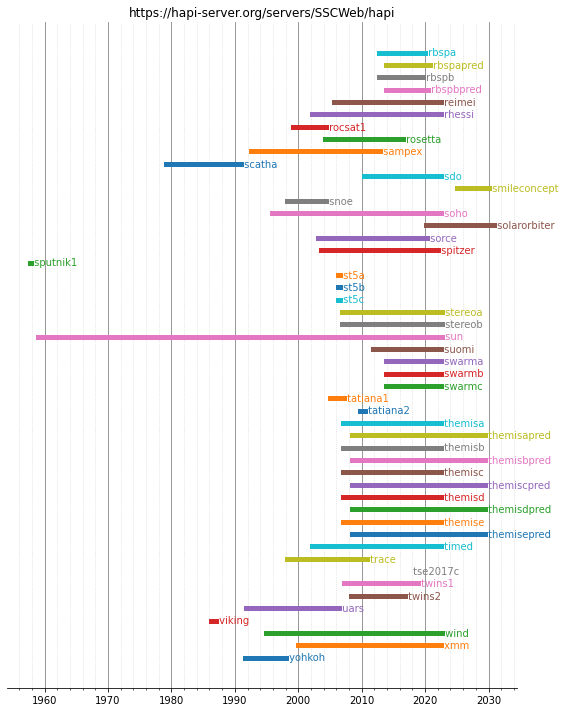

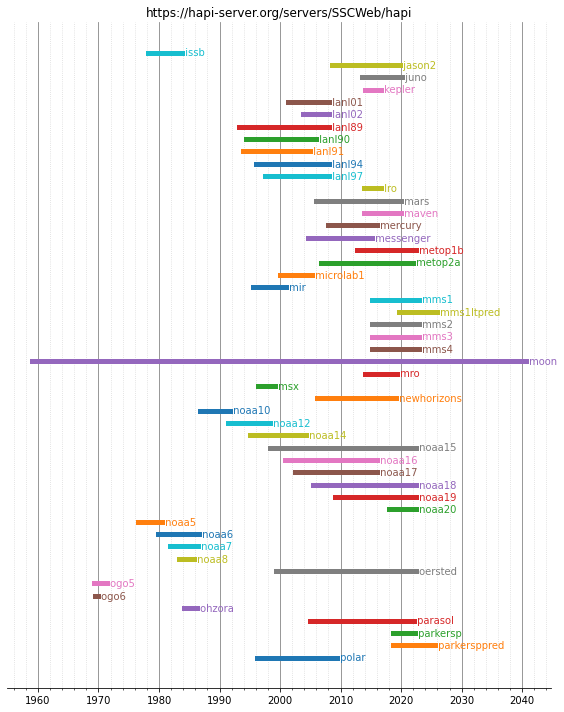

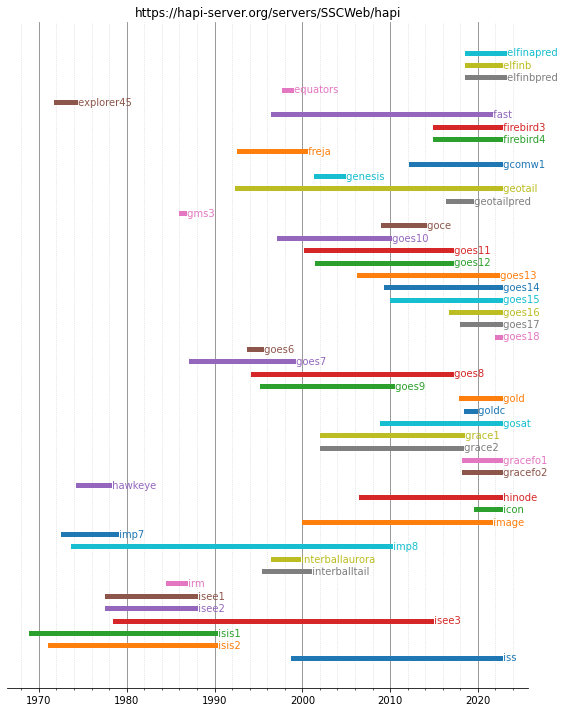

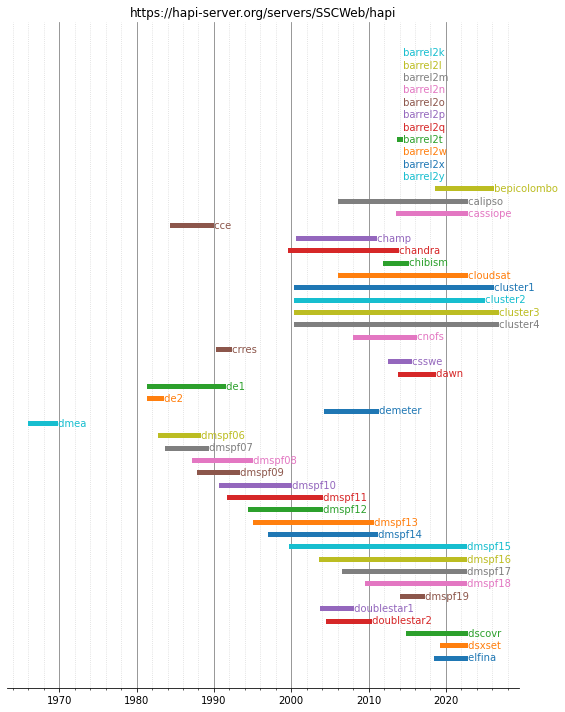

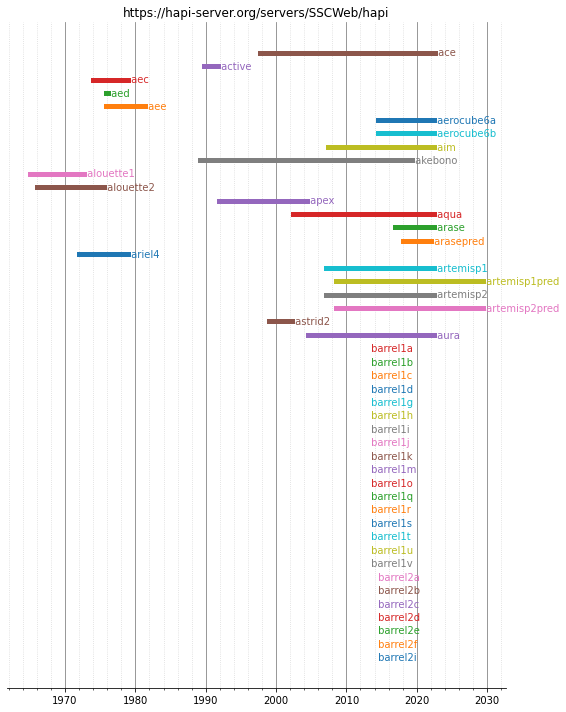

In [8]:
import sys
import logging

from hapiclient import hapitime2datetime

# Change INFO to WARNING or ERROR to suppress logging messages in this script
logging.basicConfig(level=logging.INFO)

server = 'https://hapi-server.org/servers/SSCWeb/hapi'
ids = []
starts = []
stops = []
n_max = len(datasets)
#n_max = 50 # Plot only first n_max datasets

# Solution to Working with Metadata I - Basic - 1.

# Create table
n = 0
datasets.reverse()
table = []
for idx, dataset in enumerate(datasets):
    # Pad ids. Assumes max id length is 14 chars.
    id = datasets[idx]["id"]
    idp = '{0:15s}'.format(id)
    line = f'{idp}  {datasets[idx]["startDate"]}  {datasets[idx]["stopDate"]}'
    table.append(line)

    ids.append(id)
    starts.append(hapitime2datetime(datasets[idx]["startDate"])[0])
    stops.append(hapitime2datetime(datasets[idx]["stopDate"])[0])
    n = n + 1
    if n > n_max:
        break

sys.stdout.flush()

from datetime import datetime
logging.info("Writing availability.txt")
with open('availability.txt', 'w', encoding = 'utf-8') as f:
    f.write("Table created on " + datetime.now().isoformat() + "\n\n")
    f.write("\n".join(table))
logging.info("Wrote   availability.txt")

# Solution to Working with Metadata I - Basic - 2.

# Plot
import matplotlib.pyplot as plt
from hapiplot.plot.datetick import datetick

def newfig():
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(8)
    return ax

def figconfig(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(axis='x', which='minor', alpha=0.5, linestyle=':')
    ax.grid(axis='x', which='major', color='k', alpha=0.5)
    ax.set_yticks(ticks=[])
    ax.set_title(f'{server}')
    datetick('x')

idx = []
ax = newfig()
fn = 1
for n in range(len(ids)):
    line, = ax.plot([starts[n], stops[n]], [n, n], linewidth=5)
    lc = line.get_color()
    idx.append(n)
    ax.text(stops[n], n, ' ' + ids[n], color=lc, verticalalignment='center')
    if (n + 1) % 50 == 0:
        figconfig(ax)
        plt.tight_layout()
        fname = f"./availability-{fn}.svg"
        logging.info(f'Writing {fname}')
        plt.savefig(fname, bbox_inches='tight')
        logging.info(f'Wrote   {fname}')
        fn = fn + 1
        ax = newfig()

# Finish last plot, if needed
if (n + 1) % 50 != 0:
    figconfig(ax)
    plt.tight_layout()
    logging.info(f'Writing {fname}')
    plt.savefig(f"./availability-{fn}.svg", bbox_inches='tight')
    logging.info(f'Wrote   {fname}')

## Advanced

Write a program that creates the information in the dictionary `datasets` by querying the SSCWeb HAPI server. That is, write a program that creates the content that is stored in `availability.pkl`. (Metadata queries were covered in [HAPI_02.ipynb#Metadata](HAPI_02.ipynb#Metadata).)

### Solution

In [7]:
from hapiclient import hapi
import pickle as pickle

server = 'https://hapi-server.org/servers/SSCWeb/hapi'
resp = hapi(server)

datasets = resp['catalog']

# Note that this require one request to the HAPI server for metadata for each dataset and some servers have 2000+ datasets.
# An alternative to this approach is to use the JSON files create by a crawlers that builds a metadata table for each HAPI server.
# See https://github.com/hapi-server/servers/tree/master/index.
for idx, dataset in enumerate(datasets):
    logging.info(f'Working on dataset id {datasets[idx]}')
    resp = hapi(server, dataset["id"], logging=False)
    startDate = resp["startDate"]
    stopDate = resp["stopDate"]
    # Add start/stop to each element in datasets list
    datasets[idx]["startDate"] = startDate
    datasets[idx]["stopDate"] = stopDate

# Save result so we don't need to recreate when we modify table and plot code.
with open('availability.pkl', 'wb') as f:
    logging.info('Saving availability.pkl')
    pickle.dump(datasets, f)
    logging.info('Saved  availability.pkl')

INFO:root:Working on dataset id {'id': 'ace', 'title': 'ACE'}
INFO:root:Working on dataset id {'id': 'active', 'title': 'Active'}
INFO:root:Working on dataset id {'id': 'aec', 'title': 'AE-C'}
INFO:root:Working on dataset id {'id': 'aed', 'title': 'AE-D'}
INFO:root:Working on dataset id {'id': 'aee', 'title': 'AE-E'}
INFO:root:Working on dataset id {'id': 'aerocube6a', 'title': 'AEROCUBE-6A'}
INFO:root:Working on dataset id {'id': 'aerocube6b', 'title': 'AEROCUBE-6B'}
INFO:root:Working on dataset id {'id': 'aim', 'title': 'AIM'}
INFO:root:Working on dataset id {'id': 'akebono', 'title': 'Akebono'}
INFO:root:Working on dataset id {'id': 'alouette1', 'title': 'Alouette-1'}
INFO:root:Working on dataset id {'id': 'alouette2', 'title': 'Alouette-2'}
INFO:root:Working on dataset id {'id': 'apex', 'title': 'APEX-MAIN'}
INFO:root:Working on dataset id {'id': 'aqua', 'title': 'Aqua'}
INFO:root:Working on dataset id {'id': 'arase', 'title': 'Arase (ERG)'}
INFO:root:Working on dataset id {'id': '

INFO:root:Working on dataset id {'id': 'goes13', 'title': 'GOES-13'}
INFO:root:Working on dataset id {'id': 'goes14', 'title': 'GOES-14'}
INFO:root:Working on dataset id {'id': 'goes15', 'title': 'GOES-15'}
INFO:root:Working on dataset id {'id': 'goes16', 'title': 'GOES-16'}
INFO:root:Working on dataset id {'id': 'goes17', 'title': 'GOES-17'}
INFO:root:Working on dataset id {'id': 'goes18', 'title': 'GOES-18'}
INFO:root:Working on dataset id {'id': 'goes6', 'title': 'GOES-6'}
INFO:root:Working on dataset id {'id': 'goes7', 'title': 'GOES-7'}
INFO:root:Working on dataset id {'id': 'goes8', 'title': 'GOES-8'}
INFO:root:Working on dataset id {'id': 'goes9', 'title': 'GOES-9'}
INFO:root:Working on dataset id {'id': 'gold', 'title': 'GOLD'}
INFO:root:Working on dataset id {'id': 'goldc', 'title': 'GOLD (Conceptual)'}
INFO:root:Working on dataset id {'id': 'gosat', 'title': 'GOSAT'}
INFO:root:Working on dataset id {'id': 'grace1', 'title': 'GRACE-1'}
INFO:root:Working on dataset id {'id': 'g

INFO:root:Working on dataset id {'id': 'themiscpred', 'title': 'THEMIS-C (6-year Predict)'}
INFO:root:Working on dataset id {'id': 'themisd', 'title': 'THEMIS-D (P3)'}
INFO:root:Working on dataset id {'id': 'themisdpred', 'title': 'THEMIS-D (8-year Predict)'}
INFO:root:Working on dataset id {'id': 'themise', 'title': 'THEMIS-E (P4)'}
INFO:root:Working on dataset id {'id': 'themisepred', 'title': 'THEMIS-E (8-year Predict)'}
INFO:root:Working on dataset id {'id': 'timed', 'title': 'TIMED'}
INFO:root:Working on dataset id {'id': 'trace', 'title': 'TRACE'}
INFO:root:Working on dataset id {'id': 'tse2017c', 'title': 'Total_Solar_Eclipse_2017'}
INFO:root:Working on dataset id {'id': 'twins1', 'title': 'Twins1'}
INFO:root:Working on dataset id {'id': 'twins2', 'title': 'Twins2'}
INFO:root:Working on dataset id {'id': 'uars', 'title': 'UARS'}
INFO:root:Working on dataset id {'id': 'viking', 'title': 'Viking'}
INFO:root:Working on dataset id {'id': 'wind', 'title': 'Wind'}
INFO:root:Working on

# Working with Metadata II.

Starting with

```python
import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)

start = "2003-10-31T23:00:00Z"
stop = "2003-10-31T23:59:00Z"
```

create a table that indicates the [spacecraft region](https://sscweb.gsfc.nasa.gov/users_guide/ssc_reg_doc.shtml) on `2003-10-31T23:00:00Z` for `ace`, `akebono`, `apex`, and `aqua` from SSCWeb. Your table should have columns of `Spacecraft ID`, `Region`, and `Time`, corresponding to the first time value on or after `start` as shown below.


```
--------------------------------------------------------------------------------
S/C ID           Region        Time

ace              Intpl_Med	 2003-304T23:00:00Z
akebono          D_Psphere	 2003-304T23:00:00Z
apex             D_Msphere	 2003-304T23:00:00Z
aqua             N_Psphere	 2003-304T23:00:00Z
--------------------------------------------------------------------------------
```

## Solution

In [12]:
import sys
import logging

from hapiclient import hapi
from hapiclient import hapitime2datetime

# Solution for Working with Metadata II

short_run = True # If True, only get data for first three s/c

server = 'https://hapi-server.org/servers/SSCWeb/hapi'
start = "2003-10-31T23:00:00Z"
stop = "2003-10-31T23:59:00Z"

# Create table
start_wanted = hapitime2datetime(start)
stop_wanted  = hapitime2datetime(stop)

import pickle as pickle
with open('hapicache/availability.pkl', 'rb') as f:
    datasets = pickle.load(f)

n = 0
for idx, dataset in enumerate(datasets):
    # Pad ids
    id = "{:15s}".format(datasets[idx]["id"])
    start_available = hapitime2datetime(datasets[idx]["startDate"])[0]
    stop_available = hapitime2datetime(datasets[idx]["stopDate"])[0]

    if start_available <= start_wanted and stop_available >= stop_wanted:
        n = n+1

        logging.info(f'Getting data for {datasets[idx]["id"]} from {datasets[idx]["startDate"]} to {datasets[idx]["stopDate"]}')
        data, meta = hapi(server, datasets[idx]["id"], 'Spacecraft_Region', start, stop, logging=False)

        if len(data['Spacecraft_Region']) > 0:
            datasets[idx]["Spacecraft_Region"] = data['Spacecraft_Region'][0]
            datasets[idx]["First_Value"] = data['Time'][0].decode('utf-8')
        else:
            datasets[idx]["Spacecraft_Region"] = None

    if short_run and n > 3:
        break


if short_run:
    print(f'\nAvailability of first 4 S/C from {start} to {stop}')
else:
    print(f'\n{n} S/C have ephemeris data from {start} to {stop}')

print(80*"-")
print("S/C ID           Region      Time")
print("")
n = 0
table = []
for idx, dataset in enumerate(datasets):
    id = "{:15s}".format(datasets[idx]["id"])
    if "Spacecraft_Region" in datasets[idx]:
        n = n + 1
        if datasets[idx]["Spacecraft_Region"] is not None:
            line = f'{id}  {datasets[idx]["Spacecraft_Region"]}\t {datasets[idx]["First_Value"]}'
        else:
            line = f'{id}  No values available'
        print(line)
        table.append(line)

    if short_run and n > 3:
        break
print(80*"-")

sys.stdout.flush()

from datetime import datetime
logging.info("Writing region.txt")
with open('region.txt', 'w', encoding = 'utf-8') as f:
    f.write("Table created on " + datetime.now().isoformat() + "\n\n")
    f.write("\n".join(table))
logging.info("Wrote   region.txt")



INFO:root:Getting data for ace from 1997-08-25T17:48:00.000Z to 2022-07-04T23:48:00.000Z
INFO:root:Getting data for akebono from 1989-02-23T00:00:00.000Z to 2019-05-14T00:00:00.000Z
INFO:root:Getting data for apex from 1991-12-17T00:00:00.000Z to 2004-05-01T00:00:00.000Z
INFO:root:Getting data for aqua from 2002-05-04T00:00:00.000Z to 2022-05-15T00:00:00.000Z



Availability of first 4 S/C from 2003-10-31T23:00:00Z to 2003-10-31T23:59:00Z
--------------------------------------------------------------------------------
S/C ID           Region      Time

ace              Intpl_Med	 2003-304T23:00:00Z
akebono          D_Psphere	 2003-304T23:00:00Z
apex             D_Msphere	 2003-304T23:00:00Z
aqua             N_Psphere	 2003-304T23:00:00Z
--------------------------------------------------------------------------------


INFO:root:Writing region.txt
INFO:root:Wrote   region.txt


# Working with Data

Many datasets from CDAWeb contain ephemeris (position) data for the associated satellite.

Use https://hapi-server.org/servers/ or https://heliophysicsdata.gsfc.nasa.gov/ to

1. find a CDAWeb dataset that contains the ephemeris of a satellite, and
2. find a SSCWeb dataset that contians the ephemeris of the same satellite.

Then

3. write a program to download the data, and  
4. create a plot that compares the data.

## Solution


In [14]:
from hapiclient import hapi, hapitime2datetime

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_MFI'
parameters = 'SC_pos_GSE'
start      = '1997-09-03T00:00:00Z'
stop       = '1997-09-03T00:59:00.000Z'

data_cdaweb, meta_cdaweb = hapi(server, dataset, parameters, start, stop)

xyz_gse_cdaweb = list(data_cdaweb[0][1]/6371.)

server     = 'http://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'ace'
parameters = 'X_GSE,Y_GSE,Z_GSE'

data_sscweb, meta_sscweb = hapi(server, dataset, parameters, start, stop)

xyz_gse_sscweb = [data_sscweb['X_GSE'][1],data_sscweb['Y_GSE'][1],data_sscweb['Z_GSE'][1]]

time_cdaweb = data_cdaweb['Time'][0].decode()

# Convert from YYYY-DOY to YYYY-MM-DD date format
time_sscweb = hapitime2datetime([data_sscweb['Time'][0]])[0].strftime('%Y-%m-%dT%H:%M:%S.%fZ')

# Time stamps are not idential. For a better comparison, use interpolation
# or find time values that exactly match between SSCWeb and CDAWeb data.
print('        {0:13s}{1:13s}{2:13s}'.format('X_GSE [R_E]', 'Y_GSE [R_E]', 'Z_GSE [R_E]'))
print('SSCWeb: {0:<13.8f}{1:<13.8f}{2:<13.8f}\t on {3:s}'.format(*xyz_gse_cdaweb, time_sscweb))
print('CDAWeb: {0:<13.8f}{1:<13.8f}{2:<13.8f}\t on {3:s}'.format(*xyz_gse_sscweb, time_cdaweb))

        X_GSE [R_E]  Y_GSE [R_E]  Z_GSE [R_E]  
SSCWeb: 125.02574164 5.33197300   16.23748234  	 on 1997-09-03T00:00:00.000000Z
CDAWeb: 124.94766115 5.35485023   16.21672786  	 on 1997-09-03T00:00:12.000Z


# Interpolating Time

For analysis, it is often useful to place two datasets that have different timestamps on the same time grid. 

There are many ways to do this, for example,

* Convert the timestamps in the NumPy `ndarray` returned by `hapi()` into integers, create a 1-D array of time integers to interpolate on to, and then either write your own interpolation function (not recommended) or use an interpolation function in [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.interp.html) or [SciPy](https://docs.scipy.org/doc/scipy/reference/interpolate.html). An example of converting HAPI timestamps to `datetime` objects was given in [HAPI_02.ipynb#Time-Representation](HAPI_02.ipynb#Time-Representation); one can use [`datetime` methods](https://docs.python.org/3/library/datetime.html) to convert `datetime` objects into integers.


* Place data in a Pandas `DataFrame` and use its interpolation methods (an example of placing data into a Pandas `DataFrame` was given in [HAPI_02.ipynb#Convert-to-Pandas-DataFrame](HAPI_02.ipynb#Convert-to-Pandas-DataFrame)).


* In the [SpacePy](https://github.com/heliophysicsPy/summer-school/blob/main/spacepy-tutorial/SpacePy%20-%20MMS%20Ephemeris.md) tutorial (search on `tb.inter`) on Day 2, you used the [`interpol`](https://spacepy.github.io/autosummary/spacepy.toolbox.interpol.html#spacepy.toolbox.interpol) function in [`spacepy.toolbox`](https://spacepy.github.io/toolbox.html) to perform interpolation.

Starting with the following program that reads datasets from two different data servers, use any library (or your own code) to

1. write a program that interpolates `data2` on to the time grid of `data0` and

2. create a table or plot that allows one to visually compare the interpolated values with the given values.

Optionally,

3. Write a program that averages `data0` into 1-hour time bins and compares the result with the contents of `data2`.

In [ ]:
from hapiclient import hapi, hapitime2datetime

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H0_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data0, meta0 = hapi(server, dataset, parameters, start, stop)
print('data0 = ')
print(data0)

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H2_SWE'
parameters = 'Np'
start      = '1998-02-04'
stop       = '1998-02-06'

data2, meta2 = hapi(server, dataset, parameters, start, stop)
print('\ndata2 = ')
print(data2)

# Coordinate Transform

Starting with the following program,

1. Print out the `GSE` and `GSM` values reported by SSCWeb.
2. Use SpacePy to convert the `GSE` values to `GSM`.

In [ ]:
import spacepy.coordinates as sc
from spacepy.time import Ticktock

from hapiclient import hapi, hapitime2datetime

server     = 'https://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'swarma'
parameters = 'X_GSE,Y_GSE,Z_GSE,X_GSM,Y_GSM,Z_GSM'
start      = '2013-11-26T00:00:00Z'
stop       = '2013-11-26T00:01:00Z'

opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop)
print(data)

## Solution

In [ ]:
import spacepy.coordinates as sc
from spacepy.time import Ticktock

from hapiclient import hapi, hapitime2datetime

server     = 'https://hapi-server.org/servers/SSCWeb/hapi'
dataset    = 'swarma'
parameters = 'X_GSE,Y_GSE,Z_GSE,X_GSM,Y_GSM,Z_GSM'
start      = '2013-11-26T00:00:00Z'
stop       = '2013-11-26T00:01:00Z'

opts       = {'logging': True, 'usecache': True, 'cachedir': './hapicache'}

data, meta = hapi(server, dataset, parameters, start, stop)

xyz_gse = [data['X_GSE'][0],data['Y_GSE'][0],data['Z_GSE'][0]]
xyz_gsm = [data['X_GSM'][0],data['Y_GSM'][0],data['Z_GSM'][0]]

inp = sc.Coords(xyz_gse, 'GSE', 'car')

datetimes = hapitime2datetime(data['Time'])

# Convert from YYYY-DOY to YYYY-MM-DD date format needed by SpacePy
inp.ticks = Ticktock([datetimes[0].strftime('%Y-%m-%dT%H:%M:%S.%f')], 'ISO')

output = inp.convert('GSM', 'car')
xyz_gsm_spacepy = output.data[0]

print('             X_GSM       Y_GSM       Z_GSM ')
print('SSCWeb:  {0:11.8f} {1:11.8f} {2:11.8f}'.format(*xyz_gsm))
print('SpacePy: {0:11.8f} {1:11.8f} {2:11.8f}'.format(*xyz_gsm_spacepy))

# SunPy Data Fusion

In the last part of the [SunPy Tutorial](https://github.com/heliophysicsPy/summer-school/blob/main/sunpy-tutorial/05-multi-observer-application.ipynb), you plotted solar images on 2021-04-24. 

Solar wind plasma typically ~4 days to propagate from the solar surface to Earth. 

Find and plot data from at least one spacecraft from `2021-04-24` to `2021-04-30`. Be prepared to answer questions about your interpretation of any features in the time series.